In [ ]:
import os
import zipfile
import shutil
from shutil import copyfile
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications.xception import Xception
from keras import layers
from keras import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SPLIT_SIZE = 0.9
BATCH_SIZE = 32
INPUT_SIZE = (150, 150)
EPOCH = 20
N = 16

In [ ]:
root_path = '/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection'

if os.path.exists(root_path):
  shutil.rmtree(root_path)

def create_train_val_dirs(root_path):
  training_dir = os.path.join(root_path, "training")
  validation_dir = os.path.join(root_path, "validation")
  os.makedirs(training_dir)
  os.makedirs(validation_dir)
  #training dir
  os.makedirs(os.path.join(training_dir, "bottle")) #oke - real
  os.makedirs(os.path.join(training_dir, "can")) # oke - google
  os.makedirs(os.path.join(training_dir, "cardboard")) #oke - real
  os.makedirs(os.path.join(training_dir, "glass")) #oke - real
  os.makedirs(os.path.join(training_dir, "paper")) #oke - real
  os.makedirs(os.path.join(training_dir, "plastic")) #oke - google
  os.makedirs(os.path.join(training_dir, "spoon")) #oke - real
  os.makedirs(os.path.join(training_dir, "styrofoam")) # - google
 
  #validation dir
  os.makedirs(os.path.join(validation_dir, "bottle"))
  os.makedirs(os.path.join(validation_dir, "can"))
  os.makedirs(os.path.join(validation_dir, "cardboard"))
  os.makedirs(os.path.join(validation_dir, "glass"))
  os.makedirs(os.path.join(validation_dir, "paper"))
  os.makedirs(os.path.join(validation_dir, "plastic"))
  os.makedirs(os.path.join(validation_dir, "spoon"))
  os.makedirs(os.path.join(validation_dir, "styrofoam"))

try:
  create_train_val_dirs(root_path)
  print("Succesfull !")
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

for rootdir, dirs, files in os.walk(root_path):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

Succesfull !
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/validation
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/bottle
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/can
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/cardboard
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/glass
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/paper
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/plastic
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/spoon
/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/styrofoam
/content/drive/MyD

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(f"{filename} memiliki ukuran 0 sehingga dilewatkan.")
      
  training_len = int(len(files) * SPLIT_SIZE)
  validation_len = int(len(files) - training_len)
  shuffle_set = random.sample(files, len(files))
  training_set = shuffle_set[0:training_len]
  validation_set = shuffle_set[-validation_len:]
  
  for filename in training_set:
    source = SOURCE + filename
    destiny = TRAINING + filename
    copyfile(source, destiny)

  for filename in validation_set:
    source = SOURCE + filename
    destiny = VALIDATION + filename
    copyfile(source, destiny)

In [ ]:
#source path
bottle_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/bottle/'
can_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/can/'
cardboard_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/cardboard/'
glass_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/glass/'
paper_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/paper/'
plastic_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/plastic/'
spoon_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/spoon/'
styrofoam_source_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/scraps-source/styrofoam/'

#training & validation path
training_dir = '/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/training/'
validation_dir = '/content/drive/MyDrive/recycraft/machine-learning/scraps-classification-detection/validation/'

#destiny path
bottle_training_dir = os.path.join(training_dir, 'bottle/')
bottle_validation_dir = os.path.join(validation_dir, 'bottle/')
can_training_dir = os.path.join(training_dir, 'can/')
can_validation_dir = os.path.join(validation_dir, 'can/')
cardboard_training_dir = os.path.join(training_dir, 'cardboard/')
cardboard_validation_dir = os.path.join(validation_dir, 'cardboard/')
glass_training_dir = os.path.join(training_dir, 'glass/')
glass_validation_dir = os.path.join(validation_dir, 'glass/')
paper_training_dir = os.path.join(training_dir, 'paper/')
paper_validation_dir = os.path.join(validation_dir, 'paper/')
plastic_training_dir = os.path.join(training_dir, 'plastic/')
plastic_validation_dir = os.path.join(validation_dir, 'plastic/')
spoon_training_dir = os.path.join(training_dir, 'spoon/')
spoon_validation_dir = os.path.join(validation_dir, 'spoon/')
styrofoam_training_dir = os.path.join(training_dir, 'styrofoam/')
styrofoam_validation_dir = os.path.join(validation_dir, 'styrofoam/')


if len(os.listdir(bottle_training_dir)) > 0:
  for file in os.scandir(bottle_training_dir):
    os.remove(file.path)
if len(os.listdir(bottle_validation_dir)) > 0:
  for file in os.scandir(bottle_validation_dir):
    os.remove(file.path)

if len(os.listdir(can_training_dir)) > 0:
  for file in os.scandir(can_training_dir):
    os.remove(file.path)
if len(os.listdir(can_validation_dir)) > 0:
  for file in os.scandir(can_validation_dir):
    os.remove(file.path)

if len(os.listdir(cardboard_training_dir)) > 0:
  for file in os.scandir(cardboard_training_dir):
    os.remove(file.path)
if len(os.listdir(cardboard_validation_dir)) > 0:
  for file in os.scandir(cardboard_validation_dir):
    os.remove(file.path)

if len(os.listdir(glass_training_dir)) > 0:
  for file in os.scandir(glass_training_dir):
    os.remove(file.path)
if len(os.listdir(glass_validation_dir)) > 0:
  for file in os.scandir(glass_validation_dir):
    os.remove(file.path)

if len(os.listdir(paper_training_dir)) > 0:
  for file in os.scandir(paper_training_dir):
    os.remove(file.path)
if len(os.listdir(paper_validation_dir)) > 0:
  for file in os.scandir(paper_validation_dir):
    os.remove(file.path)

if len(os.listdir(plastic_training_dir)) > 0:
  for file in os.scandir(plastic_training_dir):
    os.remove(file.path)
if len(os.listdir(plastic_validation_dir)) > 0:
  for file in os.scandir(plastic_validation_dir):
    os.remove(file.path)

if len(os.listdir(spoon_training_dir)) > 0:
  for file in os.scandir(spoon_training_dir):
    os.remove(file.path)
if len(os.listdir(spoon_validation_dir)) > 0:
  for file in os.scandir(spoon_validation_dir):
    os.remove(file.path)

if len(os.listdir(styrofoam_training_dir)) > 0:
  for file in os.scandir(styrofoam_training_dir):
    os.remove(file.path)
if len(os.listdir(styrofoam_validation_dir)) > 0:
  for file in os.scandir(styrofoam_validation_dir):
    os.remove(file.path)

split_data(bottle_source_path, bottle_training_dir, bottle_validation_dir, SPLIT_SIZE)
split_data(can_source_path, can_training_dir, can_validation_dir, SPLIT_SIZE)
split_data(cardboard_source_path, cardboard_training_dir, cardboard_validation_dir, SPLIT_SIZE)
split_data(glass_source_path, glass_training_dir, glass_validation_dir, SPLIT_SIZE)
split_data(paper_source_path, paper_training_dir, paper_validation_dir, SPLIT_SIZE)
split_data(plastic_source_path, plastic_training_dir, plastic_validation_dir, SPLIT_SIZE)
split_data(spoon_source_path, spoon_training_dir, spoon_validation_dir, SPLIT_SIZE)
split_data(styrofoam_source_path, styrofoam_training_dir, styrofoam_validation_dir, SPLIT_SIZE)

print(f"\nAda {len(os.listdir(bottle_training_dir))} gambar bottle pada training")
print(f"Ada {len(os.listdir(bottle_validation_dir))} gambar bottle pada validation")
print(f"Ada {len(os.listdir(can_training_dir))} gambar can pada training")
print(f"Ada {len(os.listdir(can_validation_dir))} gambar can pada validation")
print(f"Ada {len(os.listdir(cardboard_training_dir))} gambar cardboard pada training")
print(f"Ada {len(os.listdir(cardboard_validation_dir))} gambar cardboard pada validation")
print(f"Ada {len(os.listdir(glass_training_dir))} gambar glass pada training")
print(f"Ada {len(os.listdir(glass_validation_dir))} gambar glass pada validation")
print(f"Ada {len(os.listdir(paper_training_dir))} gambar paper pada training")
print(f"Ada {len(os.listdir(paper_validation_dir))} gambar paper pada validation")
print(f"Ada {len(os.listdir(plastic_training_dir))} gambar plastic pada training")
print(f"Ada {len(os.listdir(plastic_validation_dir))} gambar plastic pada validation")
print(f"Ada {len(os.listdir(spoon_training_dir))} gambar spoon pada training")
print(f"Ada {len(os.listdir(spoon_validation_dir))} gambar spoon pada validation")
print(f"Ada {len(os.listdir(styrofoam_training_dir))} gambar styrofoam pada training")
print(f"Ada {len(os.listdir(styrofoam_validation_dir))} gambar styrofoam pada validation")


Ada 567 gambar bottle pada training
Ada 64 gambar bottle pada validation
Ada 456 gambar can pada training
Ada 51 gambar can pada validation
Ada 640 gambar cardboard pada training
Ada 72 gambar cardboard pada validation
Ada 364 gambar glass pada training
Ada 41 gambar glass pada validation
Ada 924 gambar paper pada training
Ada 103 gambar paper pada validation
Ada 385 gambar plastic pada training
Ada 43 gambar plastic pada validation
Ada 357 gambar spoon pada training
Ada 40 gambar spoon pada validation
Ada 285 gambar styrofoam pada training
Ada 32 gambar styrofoam pada validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip=True,
                                     fill_mode = 'nearest')
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = BATCH_SIZE,
                                                      class_mode = 'categorical',
                                                      target_size = INPUT_SIZE)
  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory =VALIDATION_DIR,
                                                                batch_size = BATCH_SIZE,
                                                                class_mode = 'categorical',
                                                                target_size = INPUT_SIZE)
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 3977 images belonging to 8 classes.
Found 446 images belonging to 8 classes.


In [ ]:
pretrained_model = Xception(input_shape = INPUT_SIZE + (3,),
                                include_top = False,
                                weights ='imagenet')

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
pretrained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
last_layer = pretrained_model.get_layer('add_23')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1024)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(8, activation='softmax')(x)   
model = Model(pretrained_model.input, x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

In [ ]:
history = model.fit(train_generator, epochs = EPOCH, validation_data = validation_generator, verbose=1)

Epoch 1/20
125/125 [==============================] - 45s 338ms/step - loss: 1.2340 - accuracy: 0.7134 - val_loss: 0.4451 - val_accuracy: 0.8587
Epoch 2/20
125/125 [==============================] - 41s 328ms/step - loss: 0.5530 - accuracy: 0.8139 - val_loss: 0.3654 - val_accuracy: 0.8812
Epoch 3/20
125/125 [==============================] - 40s 320ms/step - loss: 0.4467 - accuracy: 0.8469 - val_loss: 0.3126 - val_accuracy: 0.8969
Epoch 4/20
125/125 [==============================] - 40s 317ms/step - loss: 0.4207 - accuracy: 0.8602 - val_loss: 0.2793 - val_accuracy: 0.8991
Epoch 5/20
125/125 [==============================] - 40s 317ms/step - loss: 0.3821 - accuracy: 0.8720 - val_loss: 0.3261 - val_accuracy: 0.9036
Epoch 6/20
125/125 [==============================] - 40s 321ms/step - loss: 0.3852 - accuracy: 0.8665 - val_loss: 0.2601 - val_accuracy: 0.9170
Epoch 7/20
125/125 [==============================] - 40s 319ms/step - loss: 0.3305 - accuracy: 0.8921 - val_loss: 0.2676 - val_ac

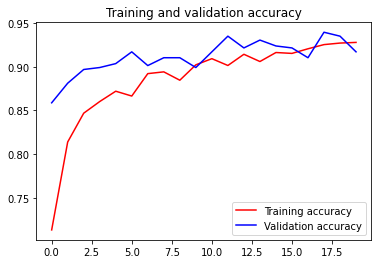

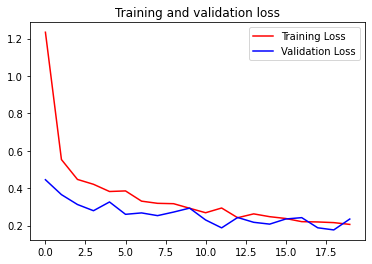

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
_, acc = model.evaluate_generator(validation_generator, steps=10, verbose=0)
print('Test Accuracy: %.3f ' % (acc * 100))

Test Accuracy: 91.250 


In [ ]:
test_x, test_y = validation_generator.__getitem__(1)
labels = (validation_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{'bottle': 0, 'can': 1, 'cardboard': 2, 'glass': 3, 'paper': 4, 'plastic': 5, 'spoon': 6, 'styrofoam': 7}
{0: 'bottle', 1: 'can', 2: 'cardboard', 3: 'glass', 4: 'paper', 5: 'plastic', 6: 'spoon', 7: 'styrofoam'}


Akurasi : 100.0 %


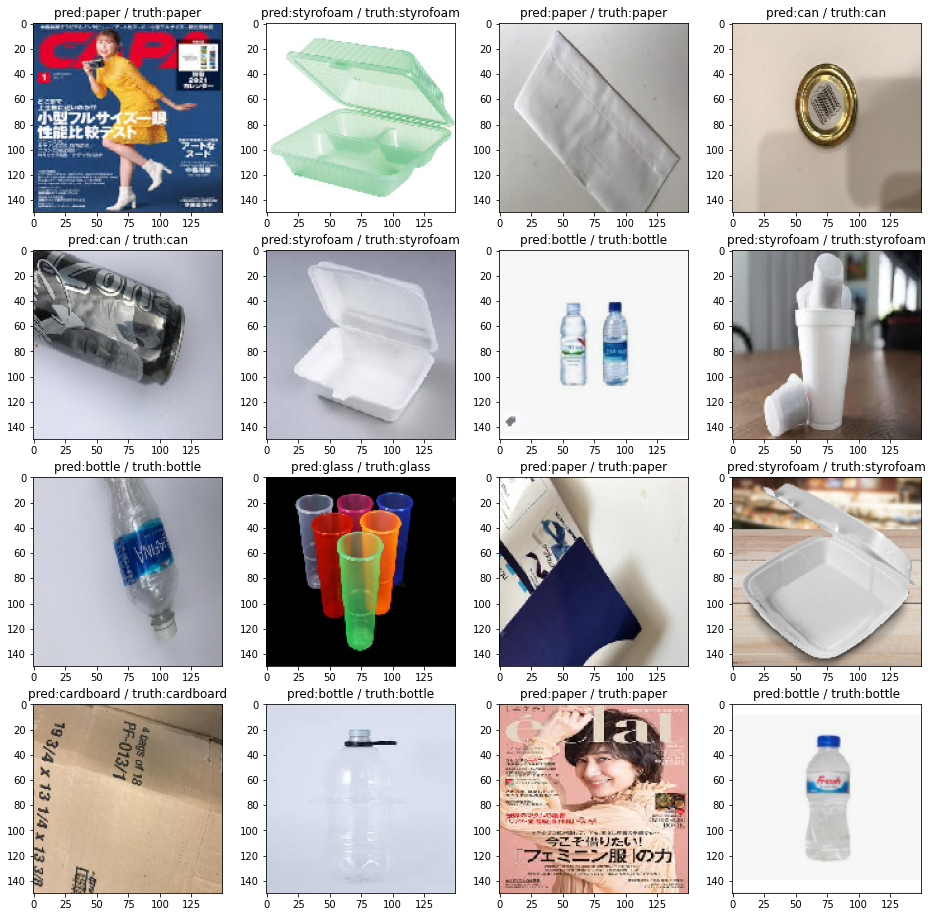

In [ ]:
y_pred = model.predict(test_x)
plt.figure(figsize=(16, 16))
n = 16
count = 0
for i in range(n):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(y_pred[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    if (np.argmax(y_pred[i]) == np.argmax(test_y[i])):
      count += 1
akurasi = count/n*100
print('Akurasi : {} %'.format(akurasi))

In [ ]:
import pathlib

export_dir = '/content/drive/MyDrive/saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/assets


In [ ]:
model.save('/content/drive/MyDrive/saved_model/scd_xception_last.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/saved_model/scd_xception_last.tflite')
tflite_model_file.write_bytes(tflite_model)
print("Model successfully created in .tflite!")

Model successfully created in .tflite!
